# Data Wrangling

Data wrangling is the process of `cleaning`, `transforming` and `organizing` data so that it can be used for `analysis` and `visualization`. It is an important step in the data analysis process because raw data is often `incomplete`, `inconsistent` and in an `unstructured` format, which can make it difficult to work with.

 - Data wrangling helps to make the data more `consistent`, `accurate` and `useful` for analysis and discision making.


## Steps
1. import libraries
2. Gathering data
3. viewing full data with different function
3. Tools to clean(mean,median,mode)
4. drop duplicates
5. outliers removal
6. normalization techniques use
7. organizing the data for understanding and for a client
8.  saving clean data
9. report prepartion


In [1]:
#librararies
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.isnull().sum()/len(df) * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
#Removing 'deck' column
df.drop(columns='deck', inplace=True)

In [8]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [9]:
# dealing missing values
df['age']=df.age.fillna(df['age'].mean())

In [10]:
df['embarked']=df.embarked.fillna(df['embarked'].mode()[0])

In [11]:
df['embark_town']=df.embark_town.fillna(df['embark_town'].mode()[0])

In [12]:
df.isnull().sum()/len(df) * 100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

In [13]:
df.shape

(891, 14)

## Finding and dropping duplicates

In [14]:
#finding duplicates
df.duplicated().sum()

111

In [15]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(780, 14)

In [17]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


# Outliers removel

## visualization wala method sy outliers check krna:


<Axes: xlabel='fare', ylabel='age'>

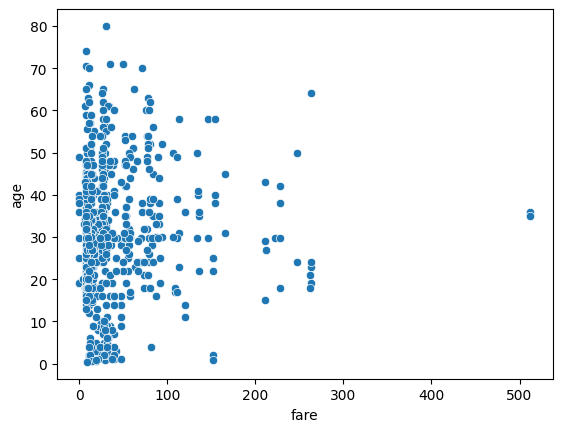

In [18]:
sns.scatterplot(data=df, x='fare', y='age')

In [19]:
# IQR(Inter-Quartile Range) Method
#Removing outliers of "age" column
Q1= df['age'].quantile(0.25)
Q3= df['age'].quantile(0.75)
IQR= Q3-Q1
IQR

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# selection  of data from 25 to  75 % 
df=df[(df['age'] > lower_bound) & (df['age'] < upper_bound)]    

In [20]:
df.shape

(748, 14)

<Axes: xlabel='fare', ylabel='Count'>

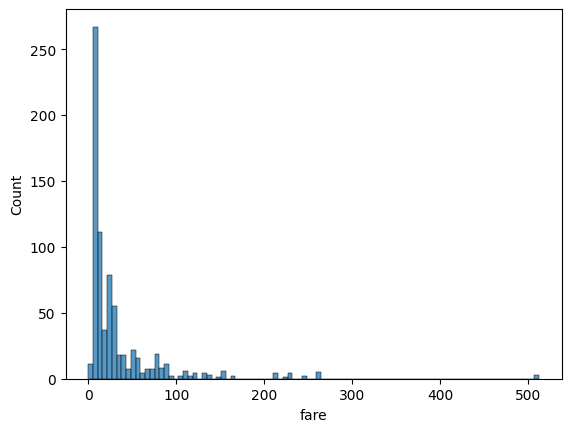

In [21]:
sns.histplot(df["fare"])

In [22]:
# IQR(Inter-Quartile Range) Method

Q1= df['fare'].quantile(0.25)
Q3= df['fare'].quantile(0.75)
IQR= Q3-Q1
IQR
  # Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
df=df[(df['fare'] > lower_bound) & (df['fare'] < upper_bound)]  

In [23]:
df.shape

(650, 14)

<Axes: xlabel='fare', ylabel='Count'>

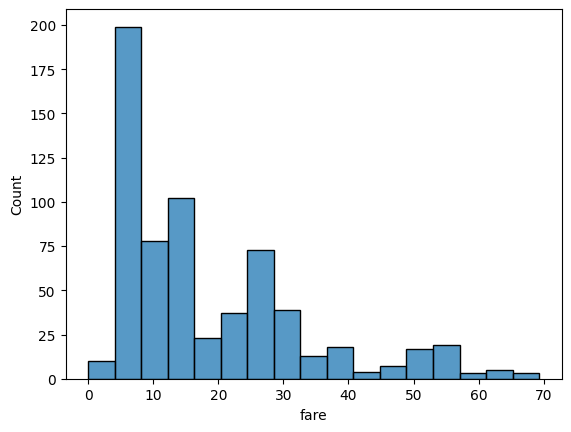

In [24]:
sns.histplot(df["fare"])

In [31]:
#pivot table
table= pd.pivot_table(df,values='fare', index='who',
                    columns = 'survived', aggfunc=np.sum)
table

survived,0,1
who,,
child,957.9959,907.6710
man,4853.1868,1641.9542
woman,964.6501,3044.7585


## Data Normalilzation

In [25]:
#pip install scikit-learn 
#Step1: import libraries
import pandas as pd 
from sklearn.preprocessing import StandardScaler
#Step2:data
df

#Step3: select column to normalize
cols_to_normalize= ['age','fare']

#Step4: Create the scaler function
scaler=StandardScaler()

#Step5: fit and transform the data on scalar or vice versa
df[cols_to_normalize]= scaler.fit_transform(df[cols_to_normalize])

#Step6: Check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.491610,1,0,-0.830159,S,Third,man,True,Southampton,no,False
2,1,3,female,-0.155043,0,0,-0.782595,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.602233,1,0,2.400676,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.602233,0,0,-0.773787,S,Third,man,True,Southampton,no,True
5,0,3,male,0.156207,0,0,-0.745016,Q,Third,man,True,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.938799,0,5,0.711270,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.744035,0,0,0.772927,S,First,woman,False,Southampton,yes,True
888,0,3,female,0.156207,1,2,0.311379,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.155043,0,0,0.772927,C,First,man,True,Cherbourg,yes,True


In [26]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,650.000000,650.000000,6.500000e+02,650.000000,650.000000,6.500000e+02
mean,0.372308,2.455385,9.291713e-17,0.498462,0.396923,-2.186285e-17
std,0.483792,0.746028,1.000770e+00,0.949007,0.841521,1.000770e+00
min,0.000000,1.000000,-2.307389e+00,0.000000,0.000000,-1.341033e+00
25%,0.000000,2.000000,-5.757517e-01,0.000000,0.000000,-7.846527e-01
50%,0.000000,3.000000,1.562071e-01,0.000000,0.000000,-4.249836e-01
75%,1.000000,3.000000,5.180908e-01,1.000000,0.000000,5.086820e-01
max,1.000000,3.000000,2.453351e+00,5.000000,6.000000,3.542214e+00


## StandardSalar equation
x_stand= (x - x(mean) / std(x))\
Where:\
X_stand is the standard variable\
x: original variable\
mean(x): the mean of variable x\
std(x): the standard daviation of variable x

## Organizing the data
apny samjhny k liye or logon ko samjhany k liye

In [27]:
# creating column of family size
df['family_size']=df['sibsp'] + df['parch']

In [28]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,-0.491610,1,0,-0.830159,S,Third,man,True,Southampton,no,False,1
2,1,3,female,-0.155043,0,0,-0.782595,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.602233,1,0,2.400676,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.602233,0,0,-0.773787,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.156207,0,0,-0.745016,Q,Third,man,True,Queenstown,no,True,0


<Axes: xlabel='family_size', ylabel='Count'>

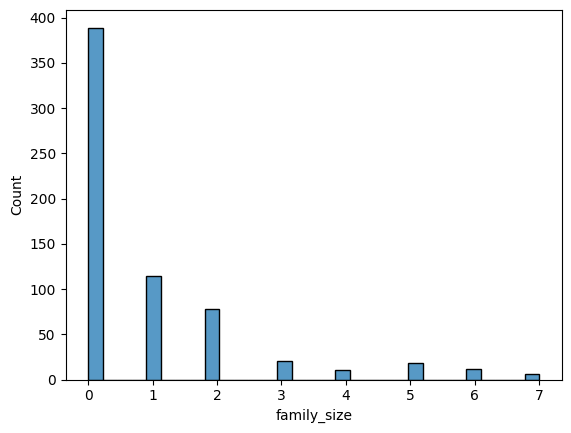

In [29]:
sns.histplot(df['family_size'])

c:\Users\Al Makkah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='age'>

c:\Users\Al Makkah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Al Makkah\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


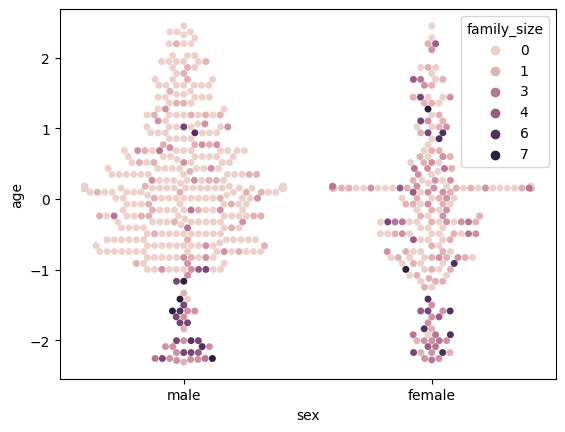

In [30]:
sns.swarmplot(data=df, x='sex', y='age', hue="family_size")

In [31]:
df= df.rename(columns={'survived':'survival'})
df.columns

Index(['survival', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone', 'family_size'],
      dtype='object')

In [32]:
#pivot table
table= pd.pivot_table(df,values='fare', index='who',
                    columns = 'survival', aggfunc=np.sum)
table

survival,0,1
who,,
child,23.251409,6.294921
man,-81.784979,19.146473
woman,-11.146552,44.238729


<Axes: xlabel='fare', ylabel='age'>

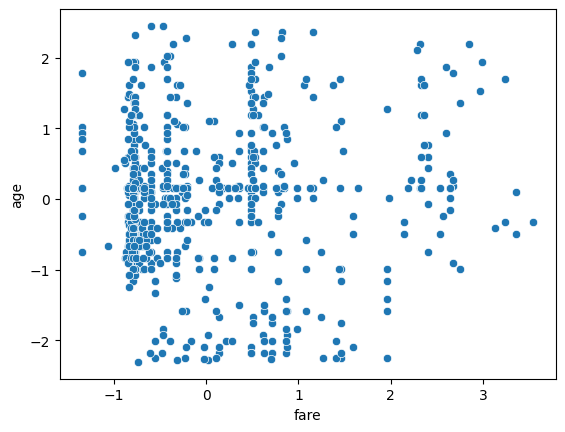

In [33]:
sns.scatterplot(data=df, x='fare', y='age')

In [34]:
df['family_size']=df['sibsp'] + df['parch']

In [35]:
df.head()

,survival,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,family_size
0,0,3,male,-0.491610,1,0,-0.830159,S,Third,man,True,Southampton,no,False,1
2,1,3,female,-0.155043,0,0,-0.782595,S,Third,woman,False,Southampton,yes,True,0
3,1,1,female,0.602233,1,0,2.400676,S,First,woman,False,Southampton,yes,False,1
4,0,3,male,0.602233,0,0,-0.773787,S,Third,man,True,Southampton,no,True,0
5,0,3,male,0.156207,0,0,-0.745016,Q,Third,man,True,Queenstown,no,True,0


## Saving the wrangled data

In [36]:
df.to_csv('clean_data.csv')